## What exactly is Exponential Smoothing?

Exponential smoothing is a time series forecasting method for univariate data. It is based on the idea that more recent observations should have a higher weight in forecasting than older observations. The method applies exponentially decreasing weights over time.

### Key Points:
1. **Simple Exponential Smoothing (SES)**: Suitable for data without trend or seasonality. The forecast is a weighted average of past observations.
2. **Holt’s Linear Trend Model**: Extends SES to capture linear trends in the data.
3. **Holt-Winters Seasonal Model**: Extends Holt’s model to capture seasonality.

### Formula:
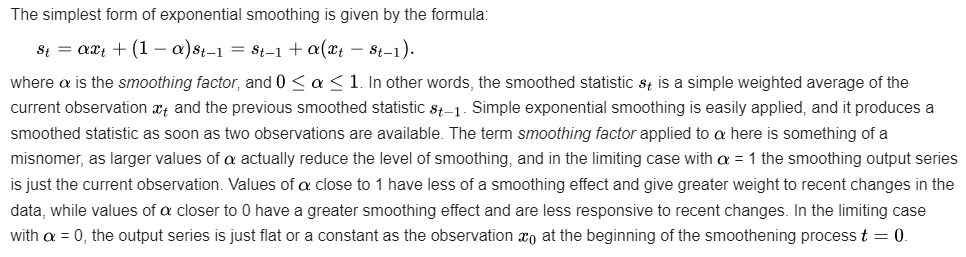
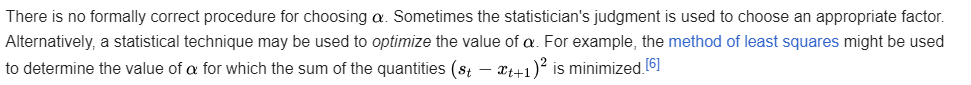


### Example on Excel:
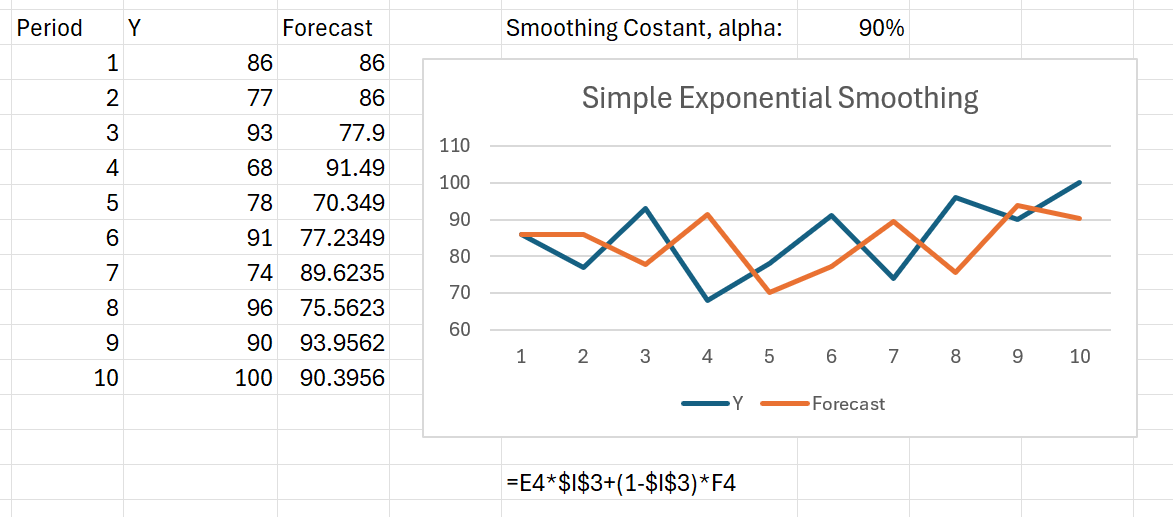


### Advantages:
- Simple to implement
- Requires minimal data storage
- Effective for short-term forecasting

### Disadvantages:
- Not suitable for data with strong trends or seasonality (unless extended models are used)
- Choice of smoothing constant \( \alpha \) can be subjective

## Fit a simple model using SimpleExpSmoothing

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import numpy as np
import matplotlib.pyplot as plt

#prepare data
random_walk = [50]
for i in range(1, 100):
    random_walk.append(random_walk[i-1] + np.random.normal(0, 1)) #generate random walk


plt.figure(figsize=(10, 6)) #specify figure size before plotting
plt.plot(random_walk)
plt.title('Random Walk')
plt.ylabel('Value')
plt.xlabel('Time')
plt.show()

In [ ]:
#create model
model = SimpleExpSmoothing(random_walk)
#fit model
model_fit = model.fit()


#plot results
plt.figure(figsize=(10, 6)) #specify figure size before plotting
plt.plot(random_walk)
plt.plot(model_fit.fittedvalues)
plt.title('Random Walk with Simple Exponential Smoothing')
plt.ylabel('Value')
plt.xlabel('Time')
plt.show()

In [ ]:
pred = model_fit.predict(start=100, end=110)
print(pred)
#plot everything with predictions
plt.figure(figsize=(10, 6)) #specify figure size before plotting
plt.plot(random_walk)
plt.plot(model_fit.fittedvalues)
plt.plot(range(100, 111), pred)  # change the x-axis range to start from 100
plt.title('Random Walk with Simple Exponential Smoothing')
plt.ylabel('Value')
plt.xlabel('Time')
plt.show()

## Using StatsForecast library:

In [8]:
import pandas as pd
import statsforecast
import numpy as np

#prepare data
random_walk = [50]
for i in range(1, 100):
    random_walk.append(random_walk[i-1] + np.random.normal(0, 1)) #generate random walk


# create a pandas dataframe

df = pd.DataFrame({'ds': list(range(len(random_walk))), 'y': random_walk, 'unique_id': 0 })
df

,ds,y,unique_id
0,0,50.000000,0
1,1,49.715889,0
2,2,49.544218,0
3,3,49.436216,0
4,4,50.252528,0
...,...,...,...
95,95,43.622436,0
96,96,45.125984,0
97,97,46.640251,0
98,98,45.812408,0


In [13]:
import os
# this makes it so that the outputs of the predict methods have the id as a column 
# instead of as the index
os.environ['NIXTLA_ID_AS_COL'] = '1'

In [20]:
from statsforecast import StatsForecast
from statsforecast.models import HoltWinters #the triple exponential smoothing method.

sf = StatsForecast(
    models=[HoltWinters(season_length = 7)], #specify the model and season length
    freq=7 #specify the frequency of the data
)

sf.fit(df)

StatsForecast(models=[HoltWinters])

In [21]:
forecast_df = sf.predict(h=12, level=[90])
forecast_df

,unique_id,ds,HoltWinters,HoltWinters-lo-90,HoltWinters-hi-90
0,0,100,46.174381,44.334221,48.014538
1,0,101,46.266647,43.673573,48.859718
2,0,102,46.290836,43.118687,49.462986
3,0,103,46.290997,42.630161,49.951832
4,0,104,46.436821,42.345177,50.528465
5,0,105,46.134033,41.652729,50.615337
6,0,106,45.925159,41.085400,50.764919
7,0,107,45.985977,40.812473,51.159477
8,0,108,46.078239,40.591198,51.565285
9,0,109,46.102432,40.318760,51.886101


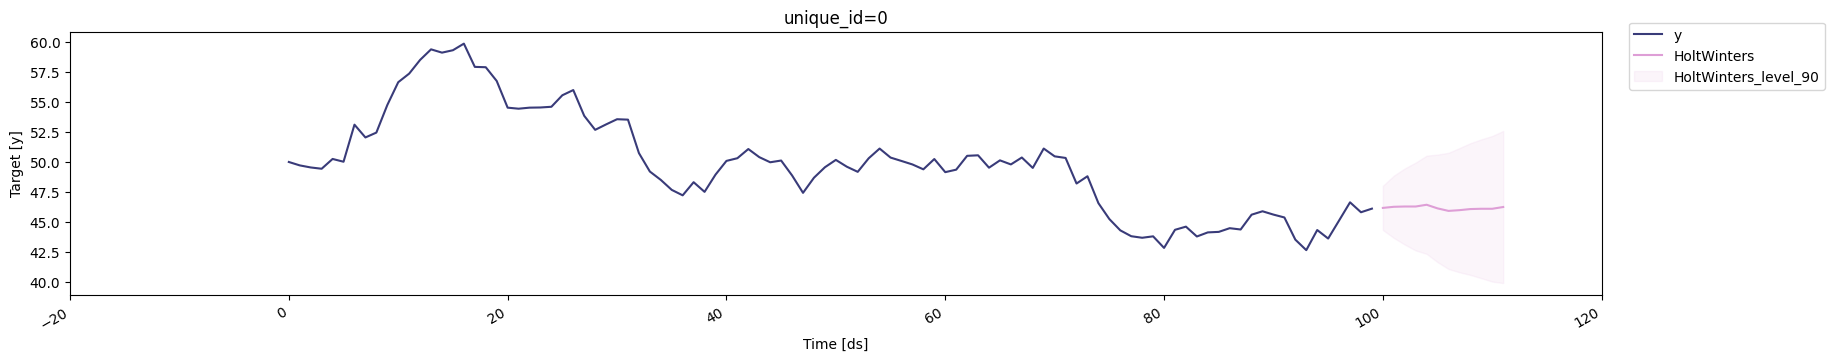

In [22]:
sf.plot(df, forecast_df, level=[90]) #plot the forecast with the 90% confidence interval

### Try Cross Validation

In [ ]:
###TO DO###

## Wanna try everything with pycaret:

In [ ]:
import pandas as pd
import pycaret
import numpy as np
#prepare data
random_walk = [50]
for i in range(1, 10000):
    random_walk.append(random_walk[i-1] + np.random.normal(0, 1)) #generate random walk

random_walk = pd.Series(random_walk)

In [ ]:
from pycaret.time_series import *
s = setup(data=random_walk, fh = 15, fold = 5, session_id = 123)

In [ ]:
best = compare_models(sort= 'R2')

In [ ]:
plot_model(best, plot = 'forecast')